In [1]:
%matplotlib widget

import ipywidgets as widgets
import matplotlib.pyplot as plt

import numpy as np

from dilax.pdf import Gauss

interactive(children=(FloatSlider(value=0.0, description='nuisance', max=4.0, min=-4.0, step=0.01), Output()),…

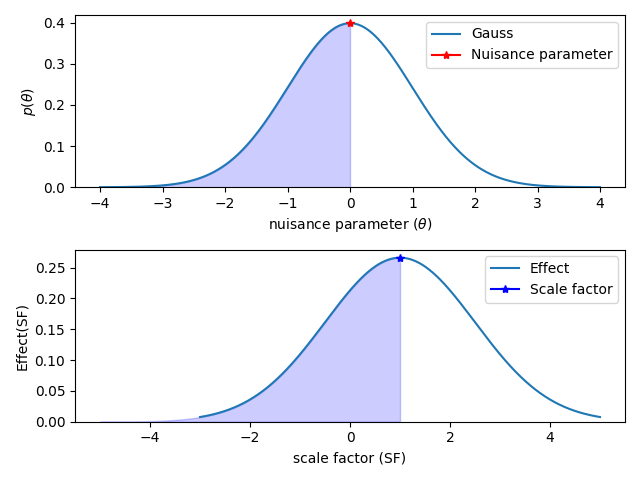

In [2]:
gauss = Gauss(mean=0, width=1)

fig, axs = plt.subplots(2)

unc = 0.5  # 50% uncertainty
effect = Gauss(mean=1, width=1 + unc)

linsp = lambda max_x: np.linspace(-4, max_x, 1000)


def sf(x):
    gx = Gauss(mean=1.0, width=1.0 + unc)
    g1 = Gauss(mean=1.0, width=1.0)
    return gx.inv_cdf(g1.cdf(x + 1))


x = linsp(4)
axs[0].plot(x, gauss.pdf(x), label="Gauss")
axs[1].plot(x + 1, effect.pdf(x + 1), label="Effect")

param_art = axs[0].plot(
    [0.0], gauss.pdf(0.0), marker="*", color="red", label="Nuisance parameter"
)
param_cdf_art = axs[0].fill_between(
    linsp(0),
    gauss.pdf(linsp(0)),
    color="b",
    alpha=0.2,
    label=f"CDF: {gauss.cdf(0):.4f}",
)

sf_art = axs[1].plot(
    [sf(0.0)], effect.pdf(sf(0.0)), marker="*", color="green", label="Scale factor"
)
sf_cdf_art = axs[1].fill_between(
    linsp(0) + 1,
    effect.pdf(linsp(0) + 1),
    color="b",
    alpha=0.2,
    label=f"CDF: {effect.cdf(1):.4f}",
)


@widgets.interact(nuisance=widgets.FloatSlider(min=-4, max=4, step=0.01, value=0.0))
def update(nuisance):
    # Plot the nuisance parameter on the gauss

    print(f"Nuisance parameter: {nuisance:.2f}")
    print(f"Scale factor: {sf(nuisance):.4f}")
    print(f"Constraint (logpdf): {gauss.logpdf(nuisance):.4f}")
    print(f"Constraint CDF: {gauss.cdf(nuisance):.4f}")
    print(f"Effect CDF: {effect.cdf(sf(nuisance)):.4f}")

    global param_art, param_cdf_art, sf_art, sf_cdf_art
    param_art[0].remove()
    param_cdf_art.remove()
    sf_art[0].remove()
    sf_cdf_art.remove()
    param_art = axs[0].plot(
        [nuisance],
        gauss.pdf(nuisance),
        marker="*",
        color="red",
        label="Nuisance parameter",
    )
    param_cdf_art = axs[0].fill_between(
        linsp(nuisance), gauss.pdf(linsp(nuisance)), color="b", alpha=0.2
    )
    sf_art = axs[1].plot(
        [sf(nuisance)],
        effect.pdf(sf(nuisance)),
        marker="*",
        color="blue",
        label="Scale factor",
    )
    sf_cdf_art = axs[1].fill_between(
        sf(linsp(nuisance)), effect.pdf(sf(linsp(nuisance))), color="b", alpha=0.2
    )
    plt.draw()


axs[0].legend()
axs[1].legend()
axs[0].set_xlabel(r"nuisance parameter ($\theta$)")
axs[0].set_ylim(0)
axs[0].set_ylabel(r"$p(\theta)$")
axs[1].set_xlabel(r"scale factor (SF)")
axs[1].set_ylim(0)
axs[1].set_ylabel(r"Effect(SF)")
plt.tight_layout()
plt.show()